In [169]:
import subprocess
import matplotlib.pyplot as plt

def get_time_ms_fib(output):
	split = output.split('= ')
	time = split[2].split(' ')[0]
	return int(time)

def get_time_ms_sel(output):
	time = output.split(' ')[0]
	return int(time)

def graph(runtimes, unit):
	langs = list(runtimes.keys())
	times = list(runtimes.values())
	fix, ax = plt.subplots()
	bars = plt.bar(range(len(runtimes)), times, tick_label=langs)
	plt.ylabel(f'time ({unit})') #, rotation='horizontal')
	ax.bar_label(bars)
	plt.show()

def fibonacci():
	runtimes = dict()
	# C
	subprocess.run(['gcc', '-O3', 'fibonacci/fibonacci.c', '-o', 'classes/fibonacci.out'])
	fib_c = subprocess.run(['classes/fibonacci.out'], stdout=subprocess.PIPE).stdout.decode('utf-8')
	runtimes['C'] = get_time_ms_fib(fib_c)
	# Java
	subprocess.run(['javac', '-d', 'classes', 'fibonacci/fibonacci.java'])
	fib_java = subprocess.run(['java', '-cp', 'classes', 'fibonacci'], stdout=subprocess.PIPE).stdout.decode('utf-8')
	runtimes['Java'] = get_time_ms_fib(fib_java)
	# Python
	fib_py = subprocess.run(['python3', 'fibonacci/fibonacci.py'], stdout=subprocess.PIPE).stdout.decode('utf-8')
	runtimes['Python'] = get_time_ms_fib(fib_py)
	graph(runtimes)

def selection():
	runtimes = dict()
	# C
	subprocess.run(['gcc', '-O3', 'selection/Selection.c', '-o', 'classes/selection.out'])
	sel_c = subprocess.run(['classes/selection.out'], stdout=subprocess.PIPE).stdout.decode('utf-8')
	runtimes['C'] = get_time_ms_sel(sel_c)
	# Java
	subprocess.run(['javac', '-d', 'classes', 'selection/Selection.java'])
	sel_java = subprocess.run(['java', '-cp', 'classes', 'Selection'], stdout=subprocess.PIPE).stdout.decode('utf-8')
	runtimes['Java'] = get_time_ms_sel(sel_java)
	# Python
	sel_py = subprocess.run(['python3', 'selection/Selection.py'], stdout=subprocess.PIPE).stdout.decode('utf-8')
	runtimes['Python'] = get_time_ms_sel(sel_py)
	graph(runtimes)

def matrixmult(size, unit): # each program returns time in µs
	# sum 2 2D matrices with index value equal to adding keys
	runtimes = dict()
	units = {'µs':1, 'ms':1000, 's':1000000}
	# C
	subprocess.run(['gcc', '-O3', 'matrixmult/MatrixMult.c', '-o', 'classes/MatrixMult.out'])
	matrmult_c = subprocess.run(['classes/MatrixMult.out', size], stdout=subprocess.PIPE).stdout.decode('utf-8')
	print(f'c [{int(int(matrmult_c) / units[unit])}]')
	runtimes['C'] = int(int(matrmult_c) / units[unit])
	# Java
	subprocess.run(['javac', '-d', 'classes', 'matrixmult/MatrixMult.java'])
	matrmult_java = subprocess.run(['java', '-cp', 'classes', 'MatrixMult', size], stdout=subprocess.PIPE).stdout.decode('utf-8')
	print(f'java [{int(int(matrmult_java) / units[unit])}]')
	runtimes['Java'] = int(int(matrmult_java) / units[unit])
	# Python
	matrmult_py = subprocess.run(['python3', 'matrixmult/MatrixMult.py', size], stdout=subprocess.PIPE).stdout.decode('utf-8')
	print(f'python [{int(int(matrmult_py) / units[unit])}]')
	runtimes['Python'] = int(int(matrmult_py) / units[unit])
	graph(runtimes, unit=unit)

def get_time_us_sum(output):
	return output.split(' ')[5]

def sum(size, unit): # each program returns time in µs
	# sum a list with each index value = its key
	runtimes = dict()
	units = {'µs':1, 'ms':1000, 's':1000000}
	# C
	subprocess.run(['gcc', '-O3', 'sum/sum.c', '-o', 'classes/sum.out'])
	sum_c = subprocess.run(['classes/sum.out', size], stdout=subprocess.PIPE).stdout.decode('utf-8')
	runtimes['C'] = int(int(sum_c) / units[unit])
	# Java
	subprocess.run(['javac', '-d', 'classes', 'sum/Sum.java'])
	sum_java = subprocess.run(['java', '-cp', 'classes', 'Sum', size], stdout=subprocess.PIPE).stdout.decode('utf-8')
	runtimes['Java'] = int(int(sum_java) / units[unit])
	# Python
	sum_py = subprocess.run(['python3', 'sum/sum.py', size], stdout=subprocess.PIPE).stdout.decode('utf-8')
	runtimes['Python'] = int(int(sum_py) / units[unit])
	# graph
	graph(runtimes, unit=unit)
	

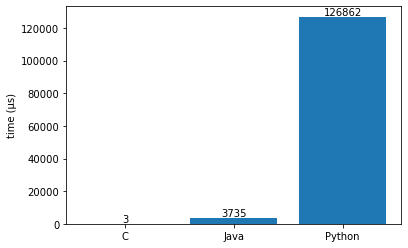

In [178]:
sum(size='1000000', unit='µs')

c [1]
java [35]
python [602]


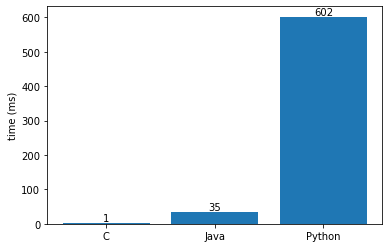

In [177]:
matrixmult(size='200', unit='ms')